### Assignment: 

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    - Choose one variable and plot that variable four different ways.
    - Choose two continuous variables, and plot them three different ways.
    - Choose one continuous variable and one categorical variable, and plot them six different ways.
    - Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    - Probability distributions
    - Bivariate relationships
    - Whether the distributions or the relationships vary across groups
    - Accompany your plot with a written description of what you see.


Dataset of choice: NBA shot log from the 2014-2015 season. 
https://www.kaggle.com/dansbecker/nba-shot-logs

Data on shots taken during the 2014-2015 season, who took the shot, where on the floor was the shot taken from, who was the nearest defender, how far away was the nearest defender, time on the shot clock, and much more.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# importing the data

shots = pd.read_csv("shot_logs.csv")
shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


#### Choose one variable and plot that variable four different ways:

Variable of choice: SHOT_DIST (the distance of the shot)

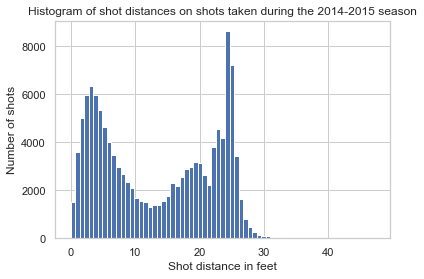

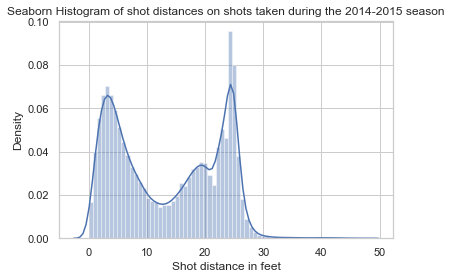

In [45]:
# Lets look at the shot distances of every shot in this dataset
# This will give us an idea of how far players are shooting from

plt.hist(shots.SHOT_DIST, bins='auto')
plt.title('Histogram of shot distances on shots taken during the 2014-2015 season')
plt.xlabel('Shot distance in feet')
plt.ylabel('Number of shots')
plt.show()

sns.distplot(shots.SHOT_DIST, bins='auto')
plt.title('Seaborn Histogram of shot distances on shots taken during the 2014-2015 season')
plt.xlabel('Shot distance in feet')
plt.ylabel('Density')
plt.show()

Looks like we have 2 peaks in the distribution of shots, with a lot of the shots are taken from within 2-7 feet from the basket, also known the "paint" area, which is proximal to the basket. Another peak can be seen, from the 25 foot range. 

The NBA adopted the three-point line at the start of the 1979–80 season. This is of variable distance, ranging from 22 feet (6.7 m) in the corners to 23.75 feet (7.24 m) behind the top of the key

A lot of 3 pointers were taken in the 2014-2015 NBA season, and it shows in this dataset. 

Just for fun, lets look at the shot selection of the two "faces" of the NBA- Lebron James and Stephen Curry. These two players are the most popular players in the NBA and have very different playing styles. Lets look at their shot selection:

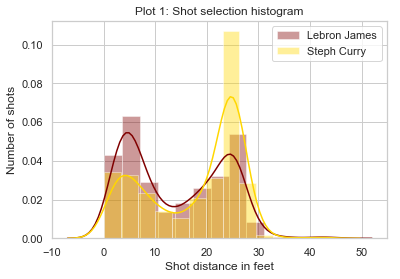

In [42]:
# Lets look at shot selections of Lebron James and Steph Curry
# Plot 1: plotting as a histogram
lebron = shots.loc[shots.player_name == 'lebron james']
steph = shots.loc[shots.player_name == 'stephen curry']
sns.distplot(lebron.SHOT_DIST, color='maroon', bins='auto', label='Lebron James')
sns.distplot(steph.SHOT_DIST, color='gold', bins='auto', label='Steph Curry')
plt.xlabel("Shot distance in feet")
plt.ylabel("Number of shots")
plt.title('Plot 1: Shot selection histogram')
plt.legend(loc='upper right')


plt.show()

Lets look and see if there is a difference in shot distances between home and away games:

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


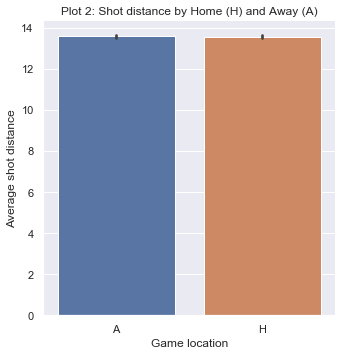

In [46]:
# Plot 2: plotting as a bar plot
sns.set(style='darkgrid')

g = sns.factorplot(x='LOCATION', y='SHOT_DIST', data=shots, kind='bar')
g.set_ylabels('Average shot distance')
g.set_xlabels("Game location")
plt.title('Plot 2: Shot distance by Home (H) and Away (A)')
plt.show()

From the bar chart, it is difficult to discern a difference between home and away shot distances. 

We need to look a little bit closer at the datapoints and we can use a pointplot to do so:


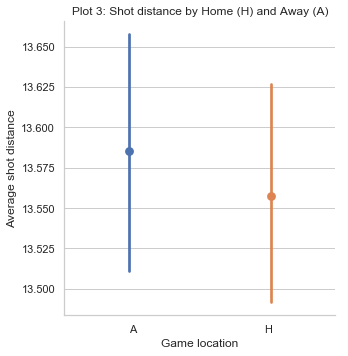

In [14]:
# Plot 3: plotting as a pointplot
sns.set(style="whitegrid")

p = sns.factorplot(x='LOCATION', y="SHOT_DIST", hue='LOCATION', data=shots, kind='point', ci=95, dodge=True, join=False)
p.set_ylabels('Average shot distance')
p.set_xlabels("Game location")
plt.title('Plot 3: Shot distance by Home (H) and Away (A)')
plt.show()

Looks like there isnt too big a difference between shot distances at home and away. It does look like shots are taken from slightly farther away at away games. 

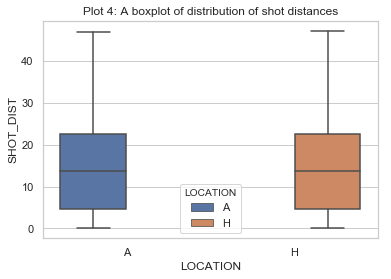

In [29]:
# Plor 4: plotting as a boxplot
sns.set(style='whitegrid')

box = sns.boxplot(x='LOCATION', y='SHOT_DIST', hue='LOCATION', data=shots)
plt.title('Plot 4: A boxplot of distribution of shot distances')
plt.show()

Choose two continuous variables, and plot them three different ways.

Lets see if there is a correlation between the number of dribbles vs time on the shotclock. The shot clock is 24 seconds long. 

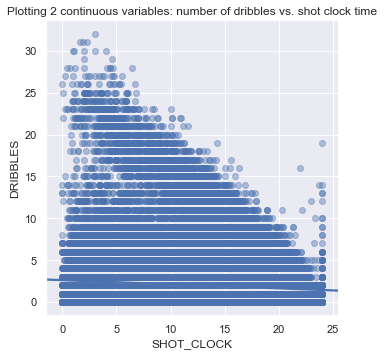

In [78]:
# Choose two continuous variables, and plot them three different ways

# Plotting number of dribbles vs. shot clock time

q = sns.lmplot(x='SHOT_CLOCK', y='DRIBBLES', data=shots, fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('Plotting 2 continuous variables: number of dribbles vs. shot clock time')
plt.show()

No real correlation can be seen between time on the shot clock and how many times a player dribbles to get that shot. 

Now, lets look at some violin plots to see the distributions of data when comparing the amount of dribbles for made and missed shots. 
- Does dribbling more lead to more made shots?

We will do the same for shot clock time for made and missed shots
- Is there a difference made and missed shot distributions with respect to what time they are shot (with respect to shot clock)

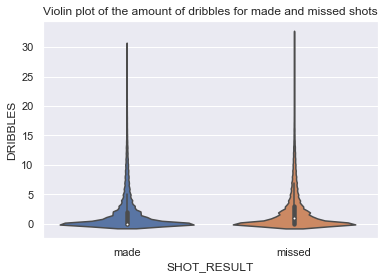

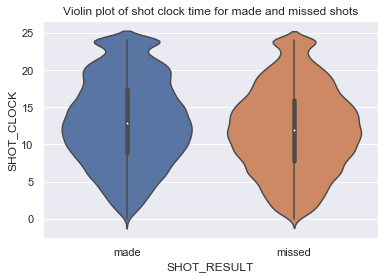

In [47]:
l = sns.violinplot(x='SHOT_RESULT', y='DRIBBLES', data=shots)
plt.title('Violin plot of the amount of dribbles for made and missed shots')
plt.show()
m = sns.violinplot(x='SHOT_RESULT', y='SHOT_CLOCK', data=shots)
plt.title('Violin plot of shot clock time for made and missed shots')
plt.show()

Both sets of distributions for made and missed shots with respect to dribbles and shot clock time seem similar. Maybe made shots are pretty much the same as missed shots, because it looks like players dribble the same amount for either, and seem to be shooting their shots at around the same time.

Adding the factor of a defender into the mix may give us more insights. If theres a defender that's close to the shooter, that should technically make it more difficult to shoot. 

Lets look at the distribution of closest defender distances for made and missed shots: 

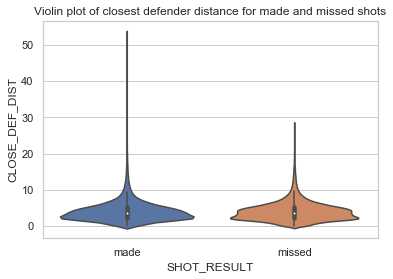

In [21]:
# Plotting to see if there is a difference in shots made or missed
# depending on the closest defender distance 
m = sns.violinplot(x='SHOT_RESULT', y='CLOSE_DEF_DIST', data=shots)
plt.title('Violin plot of closest defender distance for made and missed shots')
plt.show()

Looks like defenders seem to be just as close to shooters for made and missed shots. Players in the NBA defend well, and contest every shot to a degree. Some shots go in, some dont. It doesnt look like theres a big difference in the distribution of shots made and missed with respect to how close a defender is. 

2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.

Lets make a facetgrid of distributions of the variables that can influence whether a shot is missed or made: 


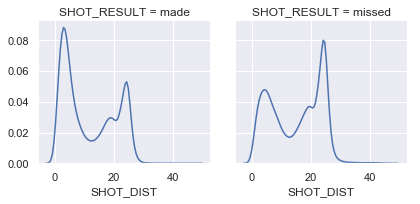

In [83]:
x = sns.FacetGrid(shots, col='SHOT_RESULT')
x.map(sns.kdeplot, 'SHOT_DIST')
plt.show()


This FacetGrid of the distances of shots, faceted by made and missed shots makes sense. Players make shots that are closer to the basket more frequently, and miss shots farther from the basket more frequently. 

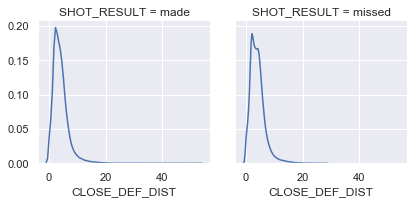

In [85]:
x = sns.FacetGrid(shots, col='SHOT_RESULT')
x.map(sns.kdeplot, 'CLOSE_DEF_DIST')
plt.show()

There seems to be no big difference when it comes to the closest defender distance and made/missed shots. This further affirms that pretty much every shot in the NBA is contested in the same way, on average, made or missed. 

<Figure size 1440x1080 with 0 Axes>

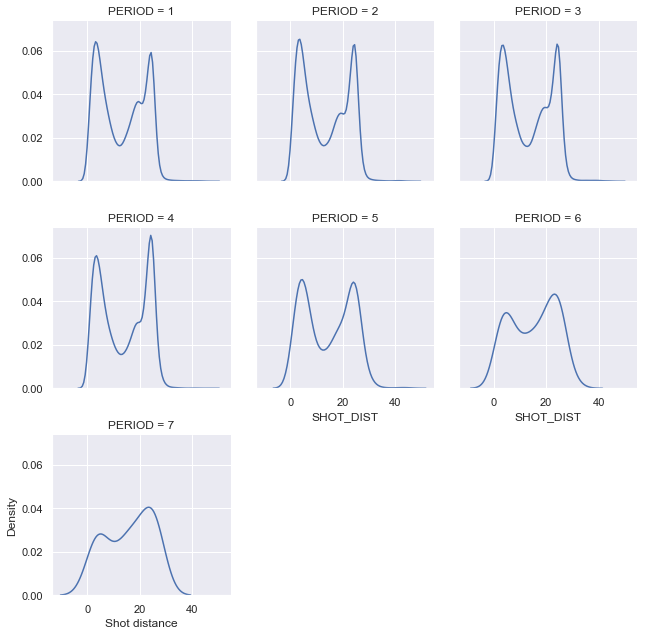

In [92]:
plt.figure(figsize=(20, 15))
y = sns.FacetGrid(shots, col='PERIOD', col_wrap=3)
y.map(sns.kdeplot, 'SHOT_DIST')
plt.xlabel('Shot distance')
plt.ylabel('Density')
plt.show()


This FacetGrid that looks at individual periods in the games and the shot distance distributions is very interesting. I'm assuming periods 1-4 are all in regular regulation time, but periods 5, 6, and 7 are overtime periods. While the first 4 periods of regulation time seem to have pretty similar distributions (high frequency of shots close to the basket, and a high frequency of 3pt shots), it looks like as the game goes into overtime, there are more 3's taken. 

Maybe because players are tired and just chucking up prayers? 

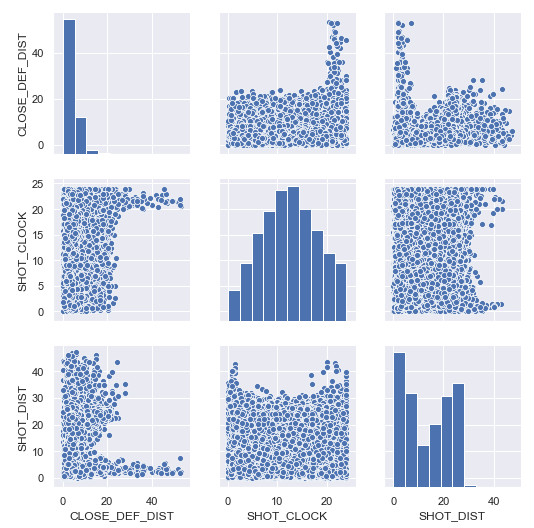

In [93]:
sns.pairplot(shots[['CLOSE_DEF_DIST', 'SHOT_CLOCK', 'SHOT_DIST']])
plt.show()

Finally, looking at a Pair Plot, we can see if the variables SHOT_DIST, SHOT_CLOCK, and CLOSE_DEF_DIST have any sort of correlation. Looks like they dont.